# Übung 01 - Polynomiale Regression

### <span style="color:CornflowerBlue">Speichern Sie die Übung in dem Ordner 01-Uebung in Ihrem Git.</span>
In der Übung soll mithilfe des in der Vorlesung vorgestellten Algorithmus zur linearen Regression mit Gradientenabstieg ein Modell erstellt werden, welches in der Lage ist eine Vorhersage für die Zielvariable $y$ mit einer Eingangsvariable $x$ zu treffen. Im ersten Schritt soll eine geeignete Hypothese für die gegeben Daten gewählt werden. Anschließend werden die Parameter der erstellten Hypothese mithilfe des Gradientenabstiegs optimiert und die Kostenfunktion visualisiert.

In [2]:
# Liste der imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

%matplotlib inline

## Aufgabe 1
Verwenden Sie in der Übung die folgenden zwei Arrays. $X_{train}$ ist Eingangsvariable und $y_{train}$ die Zielvariable.

In [3]:
global X_train
X_train= np.array([0., 0.05, 0.11, 0.16, 0.21, 0.26, 0.32, 0.37, 0.42, 0.47, 0.53, 0.58, 0.63, 0.68, 0.74, 0.79, 0.84, 0.89, 0.95, 1.])
global y_train 
y_train = np.array([0.06, -0.02, -0.01, -0.02, 0.07, -0.04, 0.15, 0.08, 0.15, 0.17, 0.28, 0.19, 0.31, 0.36, 0.48, 0.45, 0.56, 0.61, 0.72, 0.82])

Visualisieren Sie die Daten mit einem Scatterplot. Lässt sich aus der Verteilung der Daten eine geeignete Hypothese ableiten?

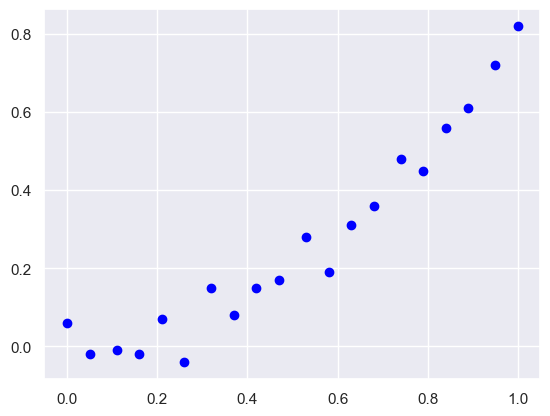

In [30]:
plt.scatter([X_train], [y_train], c="blue", label="Scatter")

## Aufgabe 2
Implementieren Sie eine Klasse für die Lineare Regression. <span style="color:CornflowerBlue">**Verwenden Sie eine Hypothese, die für die Daten aus Aufgabe 1 geeignet ist.**</span>
Die Klasse soll in der Lage sein, die Kostenfunktion für eine gegebene Menge von Trainingsdaten zu berechnen, die Parameter der linearen Regression mithilfe des Gradientenabstiegverfahrens zu bestimmen und Vorhersagen für neue Daten zu treffen. Verwenden Sie dafür das vorgegebene Template in der nächsten Zelle. Die folgenden Methoden müssen implementiert werden:

* <em>\_\_init\_\_(self, learning_rate, iterations)</em>: Konstruktor, der die Lernrate und die Anzahl der Iterationen initialisiert mit denen der Gradientenabstieg ausgeführt wird.

* <em>get_history(self)</em>: Gibt eine Liste zurück in der die Kosten von jedem Schritt des Gradientenabstiegs gespeichert sind.

* <em>cost_function(self, Y, y_pred)</em>: Die Kostenfunktion, die die Unterschiede zwischen den Vorhersagen und den tatsächlichen Werten berechnet.

* <em>fit(self, X, y)</em>: Eine Methode, die den Gradientenabstieg ausführt, um die besten Parameter für die Lineare Regression zu finden.

* <em>predict(self, X)</em>: Eine Methode, welche die Hypothese der linearen Regression auf neue Daten anwendet, um Vorhersagen zu treffen.


Setzen Sie vor dem Thadeust des Gradientabstiegs alle Parameter $\theta:=0$.

### a) Implementierung

In [14]:
import numpy as np
import typing
import math

# Hinweis: Die Kommentare können gelöscht werden
class LinearRegression:
    def __init__(self, learning_rate: float=0.1, iterations: int=1000) -> None:
        """
        Define and initialize your class members here.

        Parameters
        ----------
        learning_rate : float
            The learning rate used in gradient descent
        iterations : int
            The number of iterations to run gradient descent
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.history = []
        self.tone = 0.0
        self.ttwo = 0.0
        self.tthree = 0.0

    def get_history(self) -> typing.List[float]:
        """
        Returns
        -------
        List[float]
            List that contains the cost at each step of gradient descent.
        """
        # your code here
        return self.history

    def cost_function(self, y: np.array, y_pred: np.array) -> float:
        """
        Implement the cost function.

        Parameters
        ----------
        y : np.array
            Array with targets
        y_pred :
            Array with predicted targets

        Returns
        -------
        float
            costs
        """
        # your code here
        return np.mean((y_pred - y) ** 2)



    def fit(self, X: np.array, y: np.array) -> None:
        """
        Implement a method that fits the parameters theta of your hypothesis with gradient descent to the data.
        Performs the gradient descent for the given numbers of iterations.

        Parameters
        ----------
        X : np.array
            input data
        y : np.array
            target data
        """ 
        # your code here
        for _ in range(self.iterations):
            self.tone = self.tone - self.learning_rate * (1/len(X)) * np.sum(self.predict(X) - y)
            self.ttwo = self.ttwo - self.learning_rate * (1/len(X)) * np.sum((self.predict(X) - y) * X)
            self.tthree = self.tthree - self.learning_rate * (1/len(X)) * np.sum((self.predict(X) - y) * (X ** 2))
            self.history.append(self.cost_function(y, self.predict(X)))



    def predict(self, X: np.array) -> np.array:
        """
        Implement your hypothesis here!
        Predicts the targets for the given input X by applying the hypothesis.

        Parameters
        ----------
        X : np.array

        Returns
        ----------
        np.array
            Array with predicted target values.
        """
        # your code here
        return self.tone + self.ttwo * X + self.tthree * (X ** 2)



### b) Ausführen und Visualisieren

Führen Sie die von Ihnen implementierte lineare Regression auf den in Aufgabe 1 gegebenen Daten aus und visualisieren Sie die Hypothese sowie die Kosten des Gradientenabstiegs. Erstellen Sie dazu zwei Abbildungen nebeneinander. Auf der linken Seite der Abbildung sollen die gegebenen Daten $(X_{train}, Y_{train})$ sowie die Hypothese nach der Optimierung der Parameter angezeigt werden. Auf der rechten Seite die Kosten in Abhängigkeit der Iterationen werden. Wählen sie hierzu eine geeignete Lernrate $\alpha$ und Anzahl von Iterationen $i$.

Text(0.5, 1.0, 'Regression')

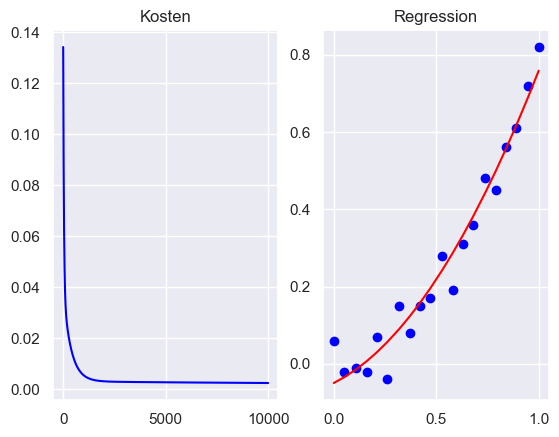

In [28]:
Sponge = LinearRegression(0.01, 10000)
Sponge.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2)
axes[0].plot(Sponge.get_history(), c="blue", label="Kosten des Gradientenabstiegs")
axes[0].set_title("Kosten")
axes[1].plot(X_train, Sponge.predict(X_train), color="red", label="Quadratische Regression")
axes[1].scatter([X_train], [y_train], c="blue", label="Scatter")
axes[1].set_title("Regression")


### c) Visualisieren der Lernkurve

Um die Kosten für den Gradientenabstieg mit unterschiedlichen Lernraten zu visualisieren, erstellen Sie eine Abbildung mit den Kosten auf der y-Achse und den Iterationen auf der x-Achse. Verwenden Sie hierfür die Kosten, welche <em>get\_history</em> zurück gibt. Plotten Sie die Kosten für die folgenden Lernraten: $[0.5, 0.3, 0.1, 0.01]$ mit jeweils $100$ Iterationen. Fügen Sie eine Legende mit den Lernraten der jeweiligen Kurven hinzu.

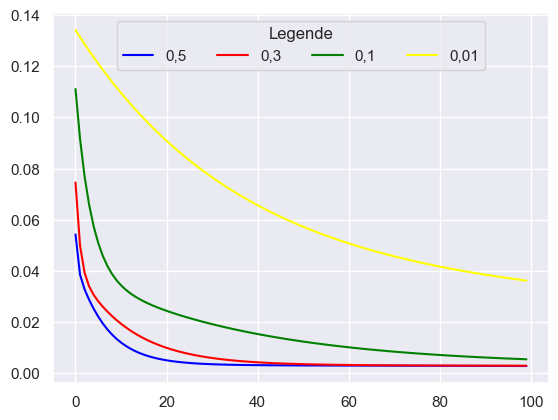

In [33]:
Sponges = LinearRegression(0.5, 100), LinearRegression(0.3, 100), LinearRegression(0.1, 100), LinearRegression(0.01, 100)

colors = ["blue", "red", "green", "yellow"]
for ele in Sponges:
    ele.fit(X_train, y_train)

Model = []
    
Model.append(plt.plot(Sponges[0].get_history(), c=colors[0], label="0.5"))
Model.append(plt.plot(Sponges[1].get_history(), c=colors[1], label="0.3"))
Model.append(plt.plot(Sponges[2].get_history(), c=colors[2], label="0.1"))
Model.append(plt.plot(Sponges[3].get_history(), c=colors[3], label="0.01"))

plt.legend(["0,5", "0,3", "0,1", "0,01"], title="Legende", loc='upper center', ncol=4)



## Testen der Implementierung
Testdaten zum Überprüfen der Implemetierung. Wenn sie Ihre Implementierung auf den Trainingsdaten $(X_{train},Y_{train})$ mit einer $learning\_rate=0.5$ und $iterations=1000$ trainieren, sollten sie auf den Testdaten einen $r2\_score \approx 0.98$ und einen $MSE \approx 0.001$ erreichen.
Führen sie hierzu die Vorhersage ($predict$) auf den Testeingangsdaten ($X_{test}$) aus und vergleichen sie das Ergebnis mit den Testzieldaten ($Y_{test}$).


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = np.array([0., 0.11, 0.22, 0.33, 0.44, 0.56, 0.67, 0.78, 0.89, 1.])
y_test = np.array([-0.04,  0.06,  0.08,  0.11,  0.19,  0.22,  0.35,  0.45,  0.62, 0.82])

# TODO: Your code here
# Sie können zur Überprüfung der Ergebnisse sklearn verwenden:
#  sklearn.metrics.mean_squared_error
#  sklearn.metrics.r2_score

Thadeus = LinearRegression(0.5, 1000)
Thadeus.fit(X_train, y_train)
Sandy = Thadeus.predict(X_test)
print(mean_squared_error(y_test, Sandy))
print(r2_score(y_test, Sandy))

0.001112095276737757
0.9834519481468699
